<a href="https://colab.research.google.com/github/YashviP/Computer-Vision-Playlist/blob/main/Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

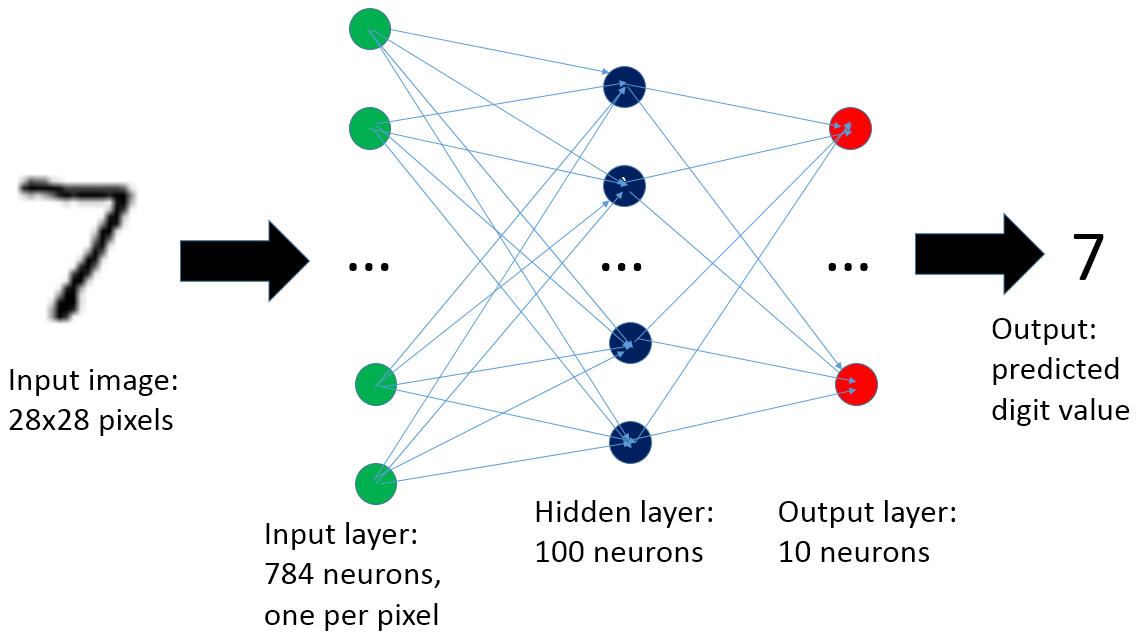

Image source - https://db-blog.web.cern.ch

### Why not use neural networks (need of CNN)
* Regular Neural Nets don’t scale well to full images.
* images of size 28x28x3=2352 i.e 2352 weights, will increase when size increase 
* full connectivity is useless and the huge number of parameters would quickly lead to overfitting

## Step 1 - Convolutional layer



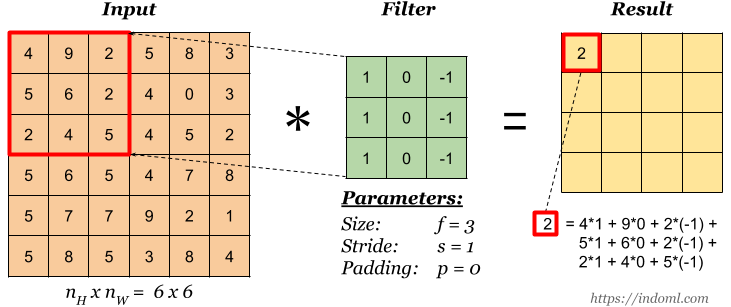

## Example

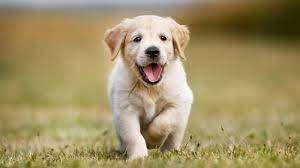

* eyes 
* nose 
* ears 

The purpose of the feature detector (or filter or kernel) is to detect  certain features or certain parts of the image 

size of the image is not reduced by applying convolution operationn

## Step 2 :  Pooling layer 

take any size of block and record maximum value of that box 

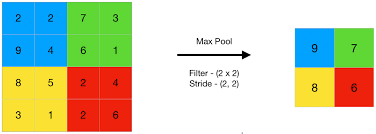

* size reduced 
* preserving features 
* preventing overfitting 

## Step 3 :  Flattening


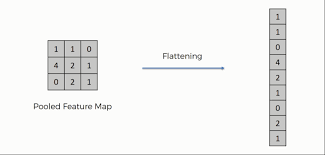

source - https://www.superdatascience.com/


## Step 4 : Fully Connected layer

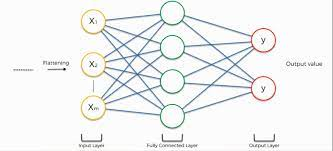

## Architecture


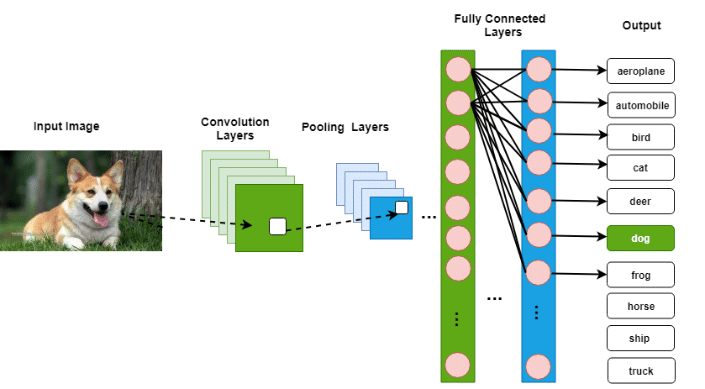

## Hand written digit classifier using CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

# network and training
EPOCHS = 5
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = tf.keras.optimizers.Adam()
VALIDATION_SPLIT=0.95
IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
NB_CLASSES = 10  # number of outputs = number of digits

#define the convnet
def build(input_shape, classes):
    model = models.Sequential()
    # CONV => RELU => POOL
    # The number of output channels for each Conv2D layer = 16
    model.add(layers.Convolution2D(16, (3,3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # CONV => RELU => POOL
    model.add(layers.Convolution2D(32, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flatten => RELU layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))

    # a softmax classifier
    model.add(layers.Dense(classes, activation="softmax"))
    return model

# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# reshape
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

# normalize
X_train, X_test = X_train / 255.0, X_test / 255.0

# cast
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)

# initialize the optimizer and model
model = build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,metrics=["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               102528    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [ ]:
callbacks = [
     # Write TensorBoard logs to './logs' directory
     tf.keras.callbacks.TensorBoard(log_dir='./logs')
   ]
# fit
history = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE, epochs=EPOCHS,
                  verbose=VERBOSE, validation_split=VALIDATION_SPLIT,
                  callbacks=callbacks)
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/5
24/24 [==============================] - 12s 508ms/step - loss: 1.6666 - accuracy: 0.5500 - val_loss: 0.8328 - val_accuracy: 0.7724
Epoch 2/5
24/24 [==============================] - 8s 347ms/step - loss: 0.5233 - accuracy: 0.8453 - val_loss: 0.4354 - val_accuracy: 0.8648
Epoch 3/5
24/24 [==============================] - 8s 348ms/step - loss: 0.3414 - accuracy: 0.8977 - val_loss: 0.3308 - val_accuracy: 0.8972
Epoch 4/5
24/24 [==============================] - 12s 499ms/step - loss: 0.2552 - accuracy: 0.9280 - val_loss: 0.2793 - val_accuracy: 0.9151
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.2120 - accuracy: 0.9368

Test score: 0.2120111584663391
Test accuracy: 0.9368000030517578
